In [22]:
from datasets import load_dataset, load_from_disk
import os


In [42]:
abstract_dataset = load_from_disk('/mimer/NOBACKUP/groups/naiss2024-23-121/morello/abstract_dataset')
abstract_dataset

Loading dataset from disk:   0%|          | 0/155 [00:00<?, ?it/s]

Dataset({
    features: ['comment', 'input', 'label', 'original_idx', 'predicate'],
    num_rows: 5282156
})

In [82]:
full_dataset = load_dataset('GGmorello/FLAMES', 'infilled', cache_dir=os.environ.get('TMPDIR'), num_proc=16, split='train')
full_dataset

Resolving data files:   0%|          | 0/155 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/255 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Loading dataset shards:   0%|          | 0/255 [00:00<?, ?it/s]

Dataset({
    features: ['comment', 'input', 'label', 'original_idx', 'predicate', 'len'],
    num_rows: 5285991
})

In [83]:
import random
random_indices1 = random.sample(range(len(abstract_dataset)), 100000)
random_indices2 = random.sample(range(len(full_dataset)), 100000)


In [85]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("codellama/CodeLlama-7b-hf",
                                         truncation=False,
                                         padding_side="left",
                                         use_fast=True,
                                      )
def func_abs(text):
    return {'len': len(tokenizer.encode(
            text['input'],
        ))}
    
def func_full(text):
    return {'len': len(tokenizer.encode(
            text['input'],
        ))}

abstract_dataset = abstract_dataset.select(random_indices1).map(func_abs, num_proc=32)
full_dataset = full_dataset.select(random_indices2).map(func_full, num_proc=64)


Map (num_proc=32):   0%|          | 0/100000 [00:00<?, ? examples/s]

Map (num_proc=64):   0%|          | 0/100000 [00:00<?, ? examples/s]

In [86]:
import matplotlib.pyplot as plt


full_sorted_vector = sorted(full_dataset['len'])
print("sorted")

# Calculate the survivorship (1 - CDF) of the integers
total_count = len(full_sorted_vector)
full_survivorship = [1 - (total_count - i) / total_count for i in range(total_count)]

print("survivorship")


sorted
survivorship


In [87]:
import matplotlib.pyplot as plt


abstract_sorted_vector = sorted(abstract_dataset['len'])
print("sorted")

# Calculate the survivorship (1 - CDF) of the integers
total_count = len(abstract_sorted_vector)
abstract_survivorship = [1 - (total_count - i) / total_count for i in range(total_count)]

print("survivorship")


sorted
survivorship


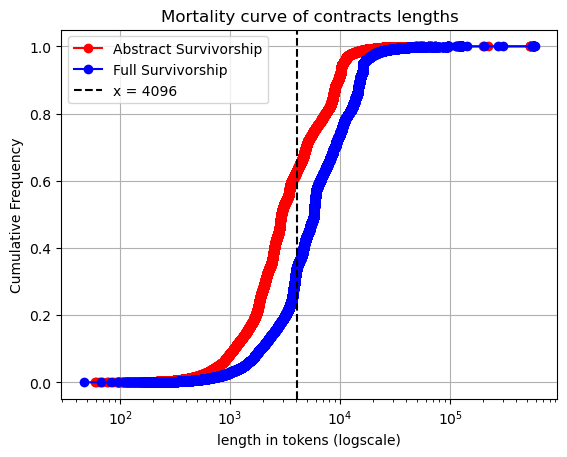

In [97]:
%matplotlib inline

# Plotting
plt.plot(abstract_sorted_vector, abstract_survivorship, marker='o', label='Abstract Survivorship', color='r')
plt.plot(full_sorted_vector, full_survivorship, marker='o', label='Full Survivorship', color='b')
plt.axvline(x=4096, color='black', linestyle='--', label='x = 4096')

plt.xlabel('length in tokens (logscale)')
plt.ylabel('Cumulative Frequency')
plt.title('Mortality curve of contracts lengths')
plt.grid(True)
plt.xscale('log')  # Set y-axis to log scale
plt.legend(loc='best')  # Adjust legend position
plt.show()

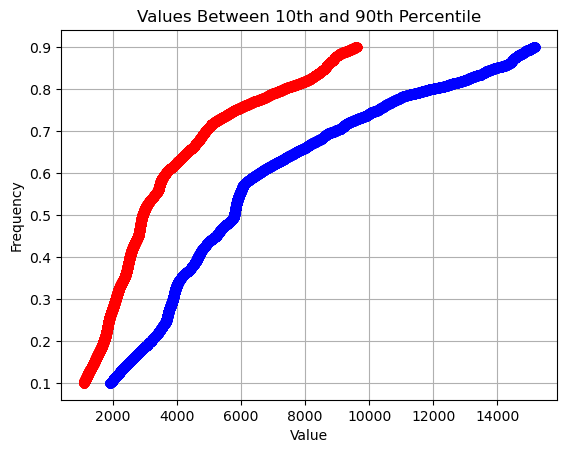

In [96]:
perc = 0.1

abstract_zoom_sorted = abstract_sorted_vector[int(perc*len(abstract_sorted_vector)) : int((1-perc)*len(abstract_sorted_vector))]
abstract_zoom_survivorship = abstract_survivorship[int(perc*len(abstract_sorted_vector)) : int((1-perc)*len(abstract_sorted_vector))]

full_zoom_sorted = full_sorted_vector[int(perc*len(full_sorted_vector)) : int((1-perc)*len(full_sorted_vector))]
full_zoom_survivorship = full_survivorship[int(perc*len(full_sorted_vector)) : int((1-perc)*len(full_sorted_vector))]


# Plotting
plt.plot(abstract_zoom_sorted, abstract_zoom_survivorship, marker='o', color='r')
plt.plot(full_zoom_sorted, full_zoom_survivorship, marker='o', color='b')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Values Between 10th and 90th Percentile')
plt.grid(True)
plt.show()


In [15]:
import numpy as np
for i in np.linspace(0,1,101):
    print(f'Max length that excludes {int(100 - i*100)}%: ', sorted_vector[int(i*len(sorted_vector))])


Max length that excludes 100%:  60
Max length that excludes 99%:  395
Max length that excludes 98%:  528
Max length that excludes 97%:  627
Max length that excludes 96%:  708
Max length that excludes 95%:  786
Max length that excludes 94%:  857
Max length that excludes 93%:  912
Max length that excludes 92%:  970
Max length that excludes 91%:  1027
Max length that excludes 90%:  1089
Max length that excludes 89%:  1148
Max length that excludes 88%:  1208
Max length that excludes 87%:  1273
Max length that excludes 86%:  1343
Max length that excludes 85%:  1406
Max length that excludes 84%:  1470
Max length that excludes 83%:  1532
Max length that excludes 82%:  1597
Max length that excludes 81%:  1657
Max length that excludes 80%:  1703
Max length that excludes 79%:  1749
Max length that excludes 78%:  1784
Max length that excludes 77%:  1814
Max length that excludes 76%:  1840
Max length that excludes 75%:  1870
Max length that excludes 74%:  1905
Max length that excludes 73%:  1949
M

IndexError: list index out of range

In [16]:
sorted_vector[-1:]

[577362]

In [20]:
dataset['len'].index(577362)

65854

In [16]:
dataset

DatasetDict({
    train: Dataset({
        features: ['contract_name', 'file_path', 'contract_address', 'language', 'source_code', 'abi', 'compiler_version', 'optimization_used', 'runs', 'constructor_arguments', 'evm_version', 'library', 'license_type', 'proxy', 'implementation', 'swarm_source', 'len'],
        num_rows: 514506
    })
})